### <b>Self Organizing Maps - SOM - Author: Teuvo Kohonen in the 1980s</b>

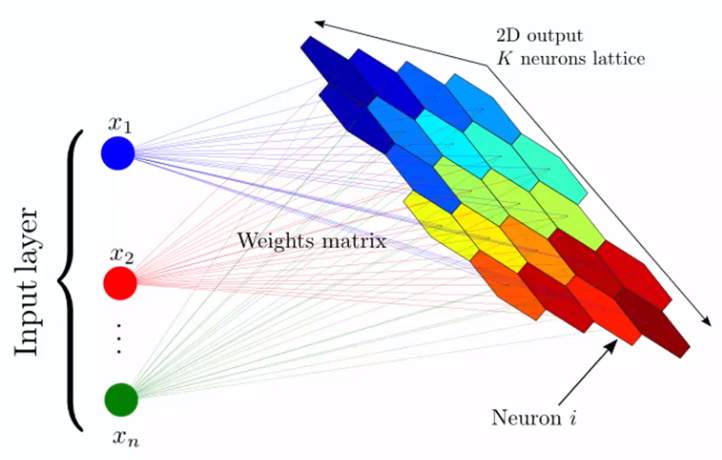
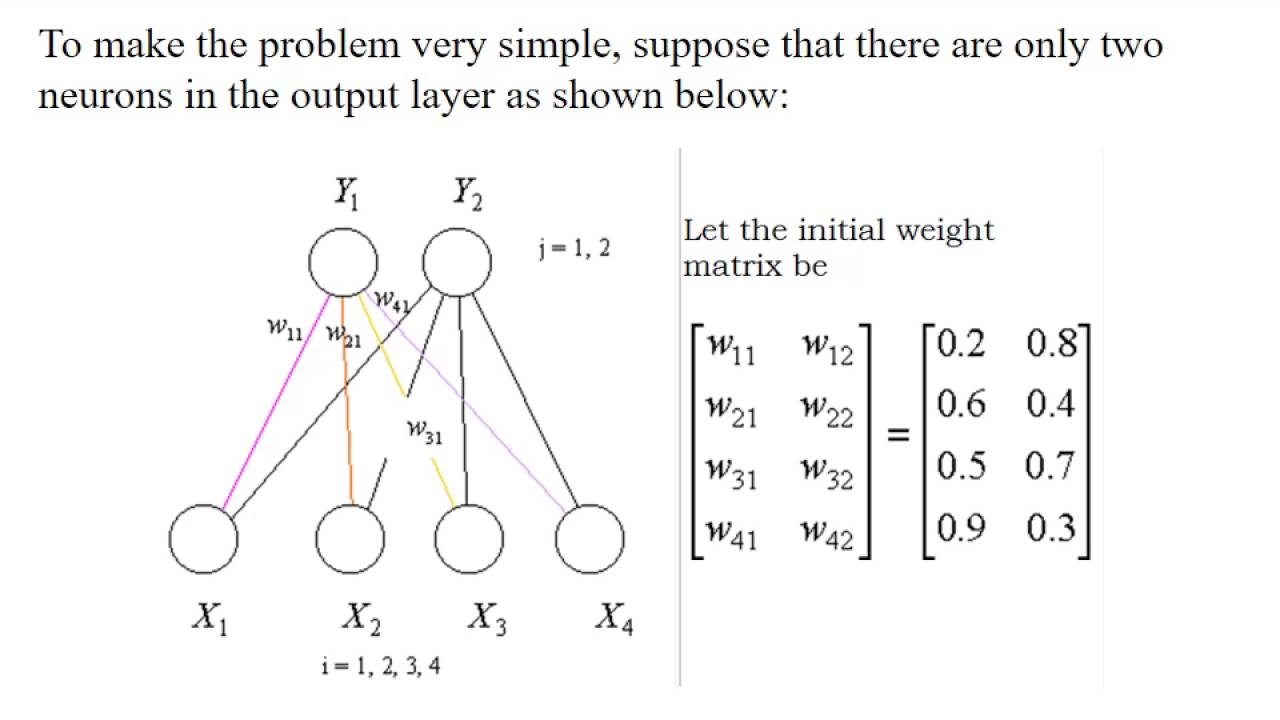
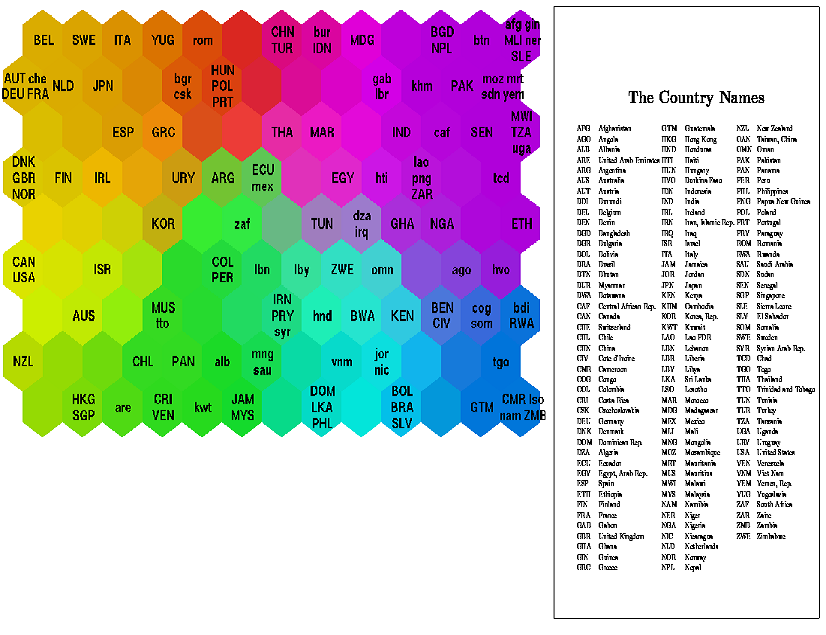
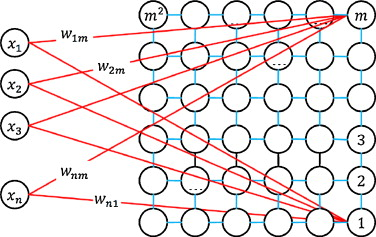
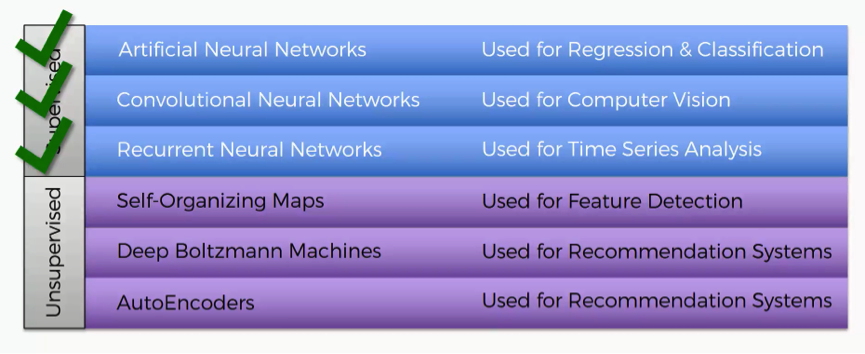
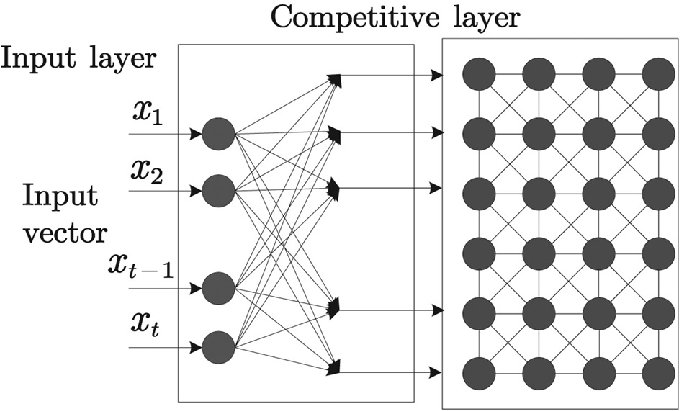
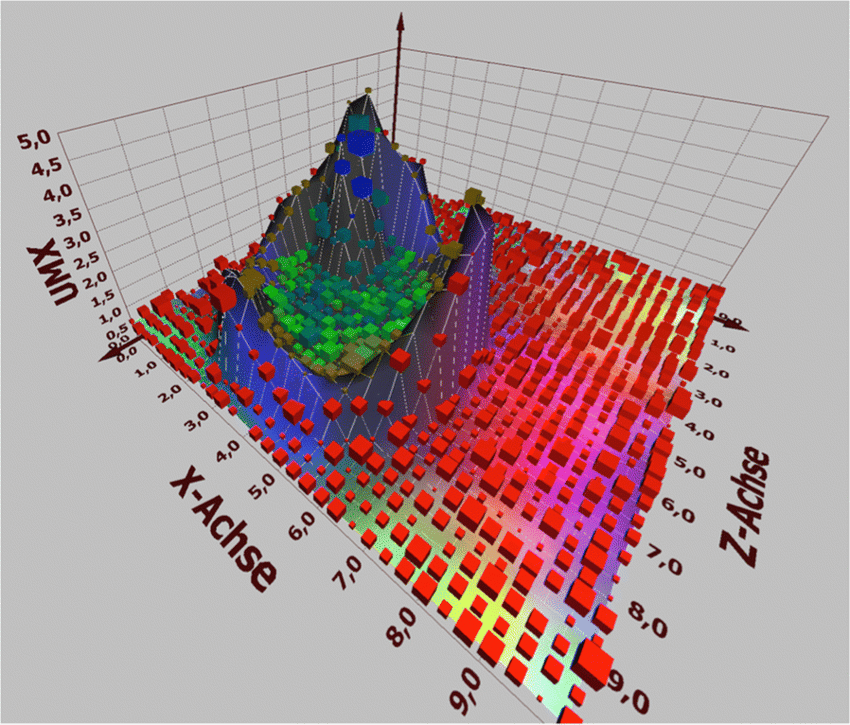

### <b>1. Importing/loading libraries</b>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
from pylab import bone
from pylab import pcolor
from pylab import colorbar
from pylab import plot
from pylab import show

### <b>2. Data preprocessing</b>

In [6]:
dataset = pd.read_csv("Credit_Card_Applications.csv")

print(f"Dataset: \n{dataset}\n")

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

print(f"X: \n{X}\n")
print(f"y: \n{y}\n")

Dataset: 
     CustomerID  A1     A2      A3  A4  A5  A6     A7  A8  A9  A10  A11  A12  \
0      15776156   1  22.08  11.460   2   4   4  1.585   0   0    0    1    2   
1      15739548   0  22.67   7.000   2   8   4  0.165   0   0    0    0    2   
2      15662854   0  29.58   1.750   1   4   4  1.250   0   0    0    1    2   
3      15687688   0  21.67  11.500   1   5   3  0.000   1   1   11    1    2   
4      15715750   1  20.17   8.170   2   6   4  1.960   1   1   14    0    2   
..          ...  ..    ...     ...  ..  ..  ..    ...  ..  ..  ...  ...  ...   
685    15808223   1  31.57  10.500   2  14   4  6.500   1   0    0    0    2   
686    15769980   1  20.67   0.415   2   8   4  0.125   0   0    0    0    2   
687    15675450   0  18.83   9.540   2   6   4  0.085   1   0    0    0    2   
688    15776494   0  27.42  14.500   2  14   8  3.085   1   1    1    0    2   
689    15592412   1  41.00   0.040   2  10   4  0.040   0   1    1    0    1   

     A13   A14  Class  
0    

In [7]:
min_max_scaler = MinMaxScaler(feature_range = (0, 1))
min_max_scaler.fit(X)
X = min_max_scaler.transform(X)

print(f"X: \n{X}\n")

X: 
[[8.42681467e-01 1.00000000e+00 1.25263158e-01 ... 5.00000000e-01
  5.00000000e-02 1.21200000e-02]
 [6.96090562e-01 0.00000000e+00 1.34135338e-01 ... 5.00000000e-01
  8.00000000e-02 0.00000000e+00]
 [3.88981656e-01 0.00000000e+00 2.38045113e-01 ... 5.00000000e-01
  1.40000000e-01 0.00000000e+00]
 ...
 [4.39420332e-01 0.00000000e+00 7.63909774e-02 ... 5.00000000e-01
  5.00000000e-02 0.00000000e+00]
 [8.44034934e-01 0.00000000e+00 2.05563910e-01 ... 5.00000000e-01
  6.00000000e-02 1.10000000e-04]
 [1.06907888e-01 1.00000000e+00 4.09774436e-01 ... 0.00000000e+00
  2.80000000e-01 0.00000000e+00]]



### <b>3. Fitting/creating the Self Organizing Maps (SOM) model for fraud detection problem</b>

In [8]:
self_organizing_maps_model = MiniSom(
    x = 10,
    y = 10,
    input_len = 15,
    sigma = 1.0,
    learning_rate = 0.5
)
self_organizing_maps_model.random_weights_init(X)
self_organizing_maps_model.train_random(data = X, num_iteration = 100)

### <b>4. Evaluating the performance of Self Organizing Maps model</b>

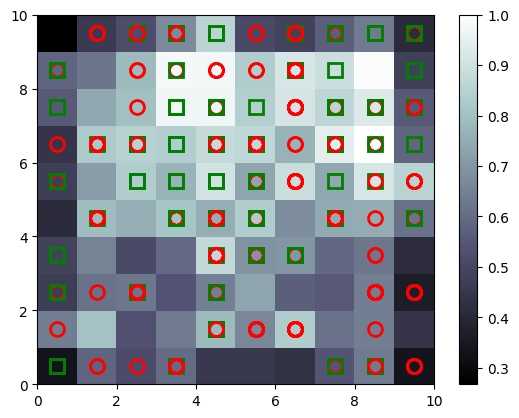

In [21]:
bone()
pcolor(self_organizing_maps_model.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = self_organizing_maps_model.winner(x)
    plot(
        w[0] + 0.5,
        w[1] + 0.5,
        markers[y[i]],
        markeredgecolor = colors[y[i]],
        markerfacecolor = 'None',
        markersize = 10,
        markeredgewidth = 2
    )
show()

In [24]:
mappings = self_organizing_maps_model.win_map(X)
frauds = np.concatenate((mappings[(8, 1)], mappings[(6,9)]), axis = 0)
frauds = min_max_scaler.inverse_transform(frauds)
print(f"Frauds: \n{frauds}\n")

Frauds: 
[[1.5665181e+07 1.0000000e+00 3.5250000e+01 1.6500000e+01 1.0000000e+00
  8.0000000e+00 4.0000000e+00 4.0000000e+00 1.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 8.0000000e+01 1.0000000e+00]
 [1.5776156e+07 1.0000000e+00 2.2080000e+01 1.1460000e+01 2.0000000e+00
  4.0000000e+00 4.0000000e+00 1.5850000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 2.0000000e+00 1.0000000e+02 1.2130000e+03]
 [1.5597709e+07 1.0000000e+00 3.2330000e+01 3.5000000e+00 2.0000000e+00
  4.0000000e+00 4.0000000e+00 5.0000000e-01 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 2.0000000e+00 2.3200000e+02 1.0000000e+00]
 [1.5642934e+07 1.0000000e+00 4.3170000e+01 5.0000000e+00 2.0000000e+00
  3.0000000e+00 5.0000000e+00 2.2500000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 2.0000000e+00 1.4100000e+02 1.0000000e+00]
 [1.5768295e+07 1.0000000e+00 2.5580000e+01 3.3500000e-01 2.0000000e+00
  4.0000000e+00 8.0000000e+00 3.5000000e+00 0.00000